# GRIP - The Sparks Foundation

# Data Science and Business Analytics Intern

# Author : Jhanvi Parmar (Batch - June2021)

# Task-01 Prediction using Supervised ML

#### Predict the percentage of a student based on study hours 

## Step-1 Importing Libraries and dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries are imported')

Libraries are imported


In [2]:
#loading dataset
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)

In [4]:
data.head() #shows first five rows of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.info() #shows the summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.describe() #calculates statistical data of dataset 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step-2 : Visualising data

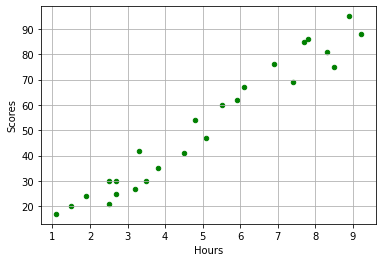

In [31]:
data.plot(kind="scatter", x = "Hours", y= "Scores", color="Green") #plotting scatter plot for finding relationship between variables
plt.grid()
plt.show()

## This plot shows that, there is positive linear relation between hours studied and achived score.

In [9]:
#corr() method is used to find correlation between columns of dataset
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
hours = data['Hours']
scores = data['Scores']

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

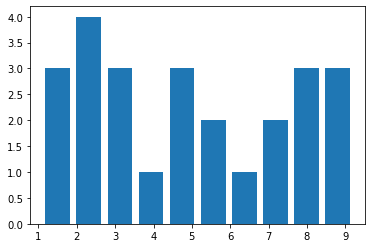

In [49]:
#checking for outliers
plt.hist(hours, rwidth=0.8)

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <BarContainer object of 10 artists>)

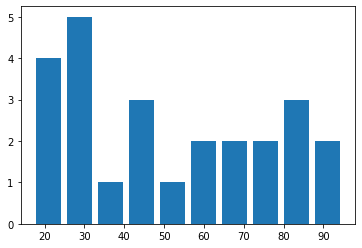

In [50]:
plt.hist(scores, rwidth=0.8)

### There are no outliers in our dataset

# Step-3 : Data preparing and spliting

In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
x = data.iloc[:, :1].values #Hours
y = data.iloc[:, -1].values #Scores 

In [15]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [17]:
#spliting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)


# Step-4 : Training Model

In [18]:
from sklearn.linear_model import LinearRegression
Regmodel = LinearRegression()
Regmodel.fit(x_train, y_train)

LinearRegression()

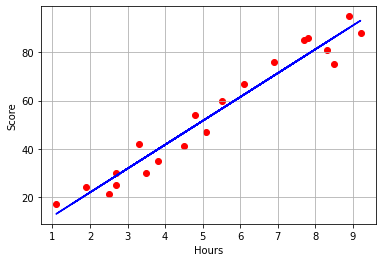

In [19]:
line = Regmodel.coef_*x + Regmodel.intercept_#y=mx+c 
plt.scatter(x_train, y_train, color = "red")
plt.plot(x, line, color = "blue")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.grid()
plt.show()

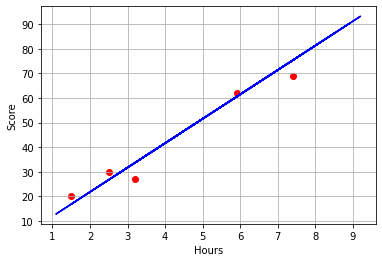

In [20]:
#testing data
plt.scatter(x_test, y_test, color = "red")
plt.plot(x, line, color = "blue")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.grid()
plt.show()

In [21]:
x_test

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [23]:
y_pred = Regmodel.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
#comparing actual and predicted values
compare = pd.DataFrame({ 'Actual' : [y_test], "Predicted" : [y_pred]})
compare

,Actual,Predicted
0,"[20, 27, 69, 30, 62]","[16.884144762398037, 33.73226077948984, 75.357..."


## Finding our answer, if a student studies for 9.25 hours then what will be his/her score

In [27]:
my_pred = Regmodel.predict([[9.25]])
print(my_pred, " will be the predicted score if a student studies for 9.25 hours/day")

[93.69173249]  will be the predicted score if a student studies for 9.25 hours/day


# Step-5 : Evaluating model

In [28]:
from sklearn import metrics
print("Mean absolute error :",metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error : 4.183859899002975


## After performing all this tasks we can say that a student can get around 93.69% score by studying 9.25hours/day and the mean absolute error (MAE) is 4.1838, which shows the average difference between actual score and predicted score